In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


Data Collection & Preprocessing
---



In [ ]:
# Load the datasets
math_df = pd.read_excel("Cleaned_student-mat2 2.xlsx")
por_df = pd.read_excel("Cleaned_student-por2 2.xlsx")


In [ ]:
# Add a subject column to each
math_df['subject'] = 'Math'
por_df['subject'] = 'Portuguese'
# Merge both datasets
combined_df = pd.concat([math_df, por_df], ignore_index=True)

# Display basic info
print("Combined Data Shape:", combined_df.shape)
print("\nColumn Names:\n", combined_df.columns.tolist())
print("\nSample Data:\n", combined_df.head())

Combined Data Shape: (1044, 34)

Column Names:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject']

Sample Data:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 subject  
0        3     4     1     1       3       

In [ ]:
# Step 1: Check for missing values
missing = combined_df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


In [ ]:
# Step 2: Drop duplicate rows (if any)
combined_df = combined_df.drop_duplicates()
print("\nData shape after removing duplicates:", combined_df.shape)


Data shape after removing duplicates: (1044, 34)


In [ ]:
# Step 3: Check datatypes
print("\nData Types:\n", combined_df.dtypes)


Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
subject       object
dtype: object


In [ ]:
# Step 4: Encode categorical variables
# Identify categorical columns
cat_cols = combined_df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns to encode:\n", cat_cols)

# Apply Label Encoding for binary categoricals and One-Hot Encoding for multiclass
combined_encoded = combined_df.copy()
label_enc = LabelEncoder()

# Binary label encoding
for col in cat_cols:
    if combined_df[col].nunique() == 2:
        combined_encoded[col] = label_enc.fit_transform(combined_df[col])
    else:
        combined_encoded = pd.get_dummies(combined_encoded, columns=[col], drop_first=True)


Categorical columns to encode:
 ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']


In [ ]:
# Step 5: Normalize numeric features
numeric_cols = combined_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('G3')  # Don't scale target variable

scaler = StandardScaler()
combined_encoded[numeric_cols] = scaler.fit_transform(combined_encoded[numeric_cols])

# Final cleaned and preprocessed data
print("\nFinal shape after encoding and scaling:", combined_encoded.shape)
print("\nPreview:\n", combined_encoded.head())



Final shape after encoding and scaling: (1044, 43)

Preview:
      school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.593575 -0.875498  1.027889  0.612776 -0.643921 -2.761901  1.242077   
1 -0.593575 -0.875498  0.221035  0.612776 -0.643921  0.362069 -1.426089   
2 -0.593575 -0.875498 -1.392674  0.612776  1.552986  0.362069 -1.426089   
3 -0.593575 -0.875498 -1.392674  0.612776 -0.643921  0.362069  1.242077   
4 -0.593575 -0.875498 -0.585820  0.612776 -0.643921  0.362069  0.352689   

       Fedu  traveltime  studytime  ...  Mjob_teacher  Fjob_health  \
0  1.466302    0.652210   0.035606  ...         False        False   
1 -1.262431   -0.715074   0.035606  ...         False        False   
2 -1.262431   -0.715074   0.035606  ...         False        False   
3 -0.352853   -0.715074   1.234713  ...         False        False   
4  0.556724   -0.715074   0.035606  ...         False        False   

   Fjob_other  Fjob_services  Fjob_teacher  reason_home  reason_o

Exploratory Data Analysis (EDA)
---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

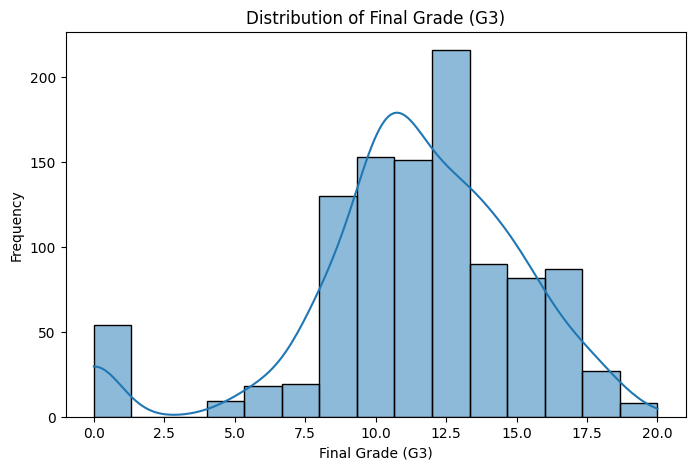

In [ ]:
# Use the original (non-encoded) combined_df for readability in plots
plt.figure(figsize=(8, 5))
sns.histplot(combined_df['G3'], bins=15, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

Interpretation:
The distribution of final grades (G3) approximates a normal distribution but with a slight right skew, indicating a concentration of students scoring in the mid-to-high range, particularly around 10 to 13. A noticeable peak is observed at grade 12, while a smaller group of students scores significantly lower (near 0), possibly indicating academic failure or non-submission. This suggests that while most students perform satisfactorily, targeted interventions may be required for the minority scoring at the lower end.

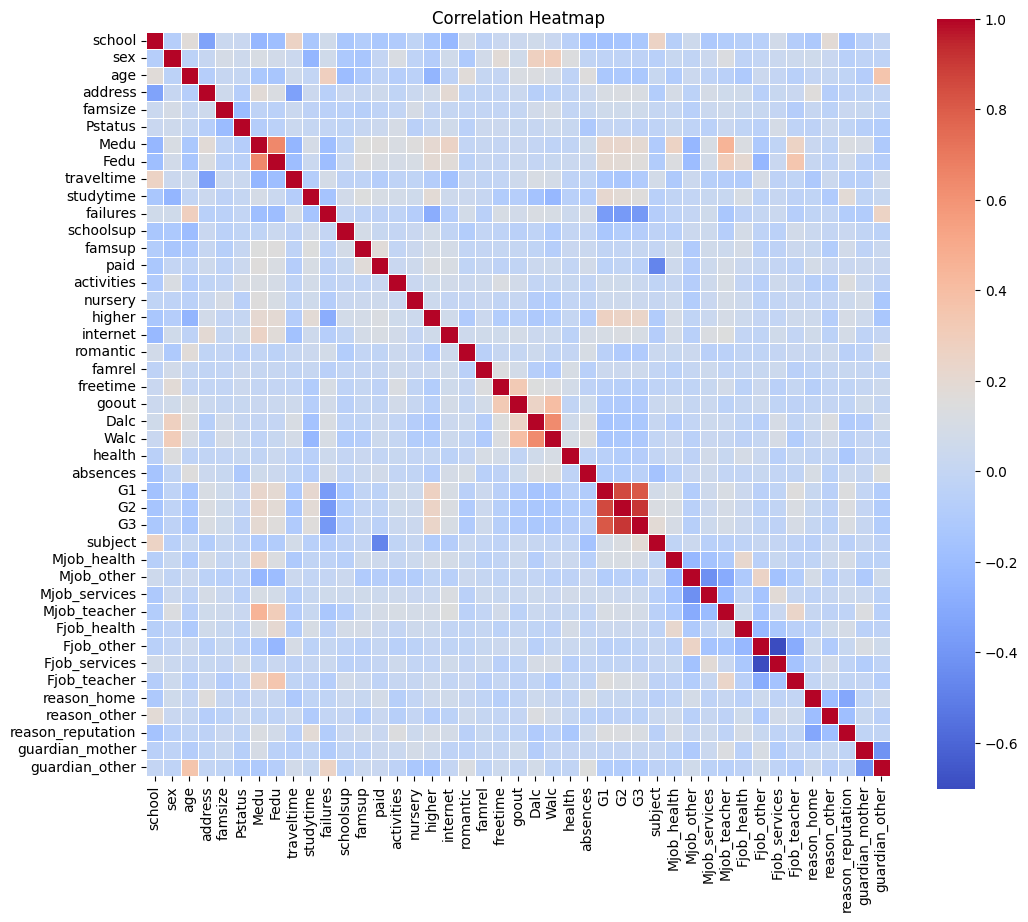

In [ ]:
# Correlation heatmap using encoded data
plt.figure(figsize=(12, 10))
corr = combined_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Interpretation:
The correlation heatmap reveals a strong positive correlation between the final grade (G3) and earlier academic scores (G1, G2), confirming the predictive value of past performance in determining final outcomes. Additionally, a negative correlation is observed with failures and absences, implying that students who have repeated years or have irregular attendance are more likely to perform poorly. Variables such as studytime and health show weak to moderate positive correlations, while lifestyle-related features (e.g., alcohol consumption Walc, Dalc) exhibit weak negative associations. Most categorical variables show low correlation, which is expected due to encoding and diverse response options. Overall, the heatmap supports the hypothesis that academic history and attendance are critical indicators of final performance.

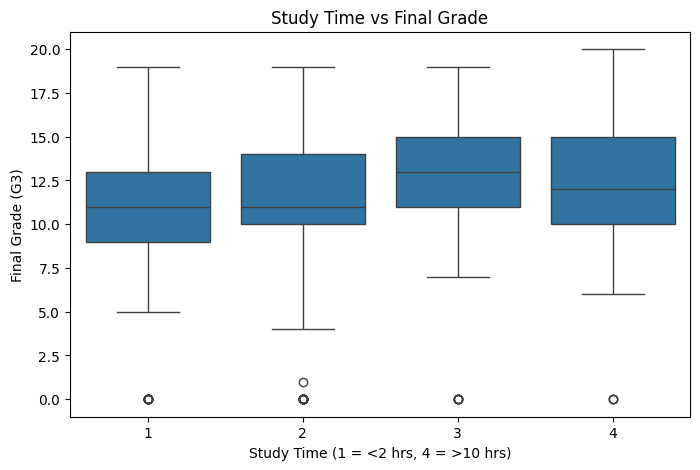

In [ ]:
# Study time vs Final Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='studytime', y='G3', data=combined_df)
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (1 = <2 hrs, 4 = >10 hrs)")
plt.ylabel("Final Grade (G3)")
plt.show()

Interpretation:
The boxplot illustrates a positive relationship between study time and final academic performance. Students who report higher study time (levels 3 and 4) tend to have a higher median grade compared to those with minimal study hours (level 1). The spread of grades is also slightly narrower among higher study groups, suggesting more consistency in performance. Despite some outliers, the overall trend reinforces that increased study time contributes positively to academic achievement.

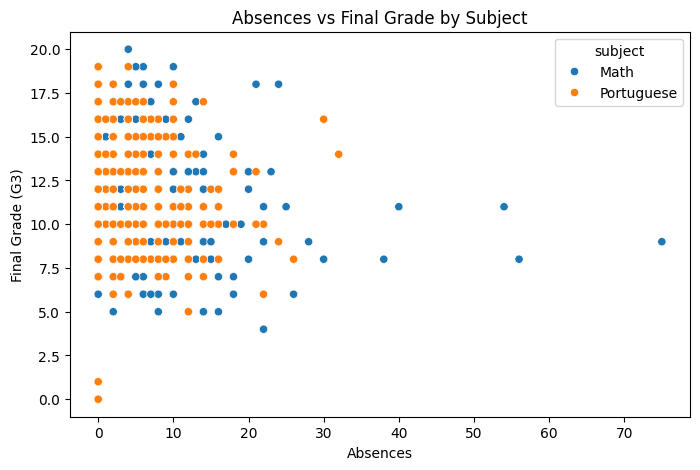

In [ ]:
# Absences vs Final Grade
plt.figure(figsize=(8, 5))
sns.scatterplot(x='absences', y='G3', hue='subject', data=combined_df)
plt.title("Absences vs Final Grade by Subject")
plt.xlabel("Absences")
plt.ylabel("Final Grade (G3)")
plt.show()

Interpretation:
The scatterplot reveals a negative relationship between absences and final grades across both subjects. As the number of absences increases, students tend to achieve lower final grades, particularly evident in cases with over 20 absences. The trend holds for both Math and Portuguese students, though Portuguese students show a slightly denser concentration in the lower-absence region. Overall, excessive absenteeism appears to adversely impact academic performance, reinforcing the importance of regular attendance.

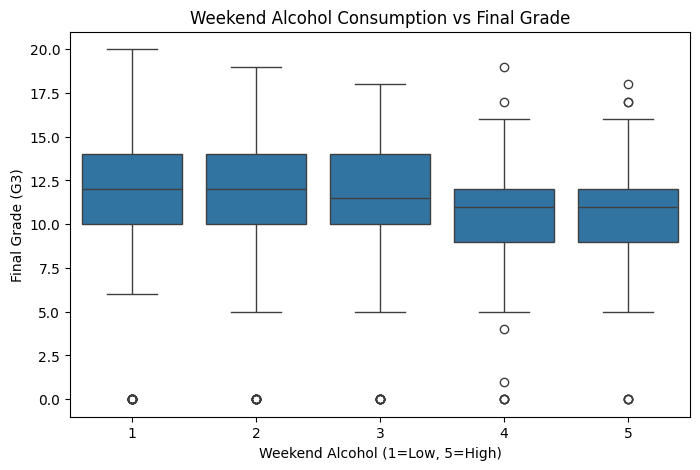

In [ ]:
# Alcohol consumption (weekend) vs Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='Walc', y='G3', data=combined_df)
plt.title("Weekend Alcohol Consumption vs Final Grade")
plt.xlabel("Weekend Alcohol (1=Low, 5=High)")
plt.ylabel("Final Grade (G3)")
plt.show()


Interpretation:
The boxplot suggests a slight negative trend between weekend alcohol consumption and academic performance. Students with lower levels of weekend alcohol use (levels 1 and 2) tend to have slightly higher median grades compared to those reporting higher consumption (levels 4 and 5). Additionally, greater alcohol use is associated with a wider spread and more frequent low outliers, indicating increased academic variability. While the overall decline is modest, the pattern implies that excessive weekend drinking may contribute to lower academic outcomes.


Feature Engineering
---


In [ ]:
# Start from the original combined_df
feature_df = combined_df.copy()

# 1. Create a Risk Index (0-10 scale combining: failures, absences, alcohol use)
feature_df['risk_index'] = (
    (feature_df['failures'] * 2) +
    (feature_df['absences'] / feature_df['absences'].max()) * 3 +
    (feature_df['Dalc'] + feature_df['Walc']) / 2
)

# Normalize risk_index to 0–10
feature_df['risk_index'] = (feature_df['risk_index'] - feature_df['risk_index'].min()) / \
                           (feature_df['risk_index'].max() - feature_df['risk_index'].min()) * 10

In [ ]:
# 2. Study Efficiency Score: average of study time and previous grades
feature_df['study_efficiency_score'] = (feature_df['studytime'] * 2 + feature_df['G1'] + feature_df['G2']) / 4

In [ ]:
# 3.Binning some continuous variables for interpretability
#Binned absences
feature_df['absences_bin'] = pd.cut(feature_df['absences'],
                                    bins=[-1, 0, 5, 15, 100],
                                    labels=['None', 'Low', 'Medium', 'High'])

# previous grade average (G1 & G2)
feature_df['performance_level'] = pd.cut((feature_df['G1'] + feature_df['G2']) / 2,
                                         bins=[-1, 5, 10, 15, 20],
                                         labels=['Poor', 'Average', 'Good', 'Excellent'])

# Preview
print(feature_df[['failures', 'absences', 'Dalc', 'Walc', 'risk_index', 'study_efficiency_score', 'absences_bin', 'performance_level']].head())


   failures  absences  Dalc  Walc  risk_index  study_efficiency_score  \
0         0         6     1     1    0.225564                    3.75   
1         0         4     1     1    0.150376                    3.50   
2         3        10     2     3    7.424812                    4.75   
3         0         2     1     1    0.075188                    8.75   
4         0         4     1     2    0.620301                    5.00   

  absences_bin performance_level  
0       Medium           Average  
1          Low              Poor  
2       Medium           Average  
3          Low              Good  
4          Low           Average  


Model Training
---


**Model 1: Decision Tree Regression**





In [ ]:
# Step 1: Initialize model
dt_model = DecisionTreeRegressor(random_state=42)

# Step 2: Train the model
dt_model.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Step 4: Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Performance")
print(f"RMSE: {rmse_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")


Decision Tree Regression Performance
RMSE: 2.16
MSE: 4.67
MAE: 1.21
R² Score: 0.70


**Interpretation:**
The Decision Tree Regression model captures non-linear relationships between student performance and influencing factors. It achieved an R² score of 0.70, indicating that it explains 70% of the variance in the final grade (G3). While this is slightly lower than the Linear Regression model, it still reflects a reasonably good fit.

The error metrics — RMSE of 2.16 and MAE of 1.21 — indicate a moderate level of prediction error, with predictions deviating by slightly over 1 grade point on average. These results suggest that the Decision Tree model is capable of modeling more complex academic patterns, but may be prone to overfitting or capturing noise, especially given the reduced generalization compared to the linear model.


**Model 2: Random Forest Regression**

In [ ]:
# Step 1: Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Step 4: Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Regression Performance
RMSE: 1.62
MSE: 2.62
MAE: 0.93
R² Score: 0.83


**Interpretation:**
The Random Forest Regression model demonstrates superior predictive performance compared to both Linear and Decision Tree Regression. It achieved an R² score of 0.83, indicating that the model explains 83% of the variance in the final grades (G3). This reflects a robust ability to generalize across diverse student profiles.

The RMSE of 1.62 and MAE of 0.93 are the lowest observed so far, suggesting high accuracy and stability. On average, predictions deviate by less than 1 grade point, and the model effectively mitigates overfitting seen in individual decision trees by aggregating multiple learners.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
# Step 1: Add binary target
combined_encoded['pass'] = (combined_encoded['G3'] >= 10).astype(int)

# Step 2: Define features and new binary target
X_cls = combined_encoded.drop(columns=['G3', 'pass'])
y_cls = combined_encoded['pass']

# Step 3: Base train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Print class balance
print("Original Class Distribution:\n", y_train_cls.value_counts())


Original Class Distribution:
 pass
1    651
0    184
Name: count, dtype: int64


In [ ]:
# Train on original imbalanced data
xgb_orig = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_orig.fit(X_train_cls, y_train_cls)
y_pred_xgb_orig = xgb_orig.predict(X_test_cls)

print("XGBoost - Original Data")
print(confusion_matrix(y_test_cls, y_pred_xgb_orig))
print(classification_report(y_test_cls, y_pred_xgb_orig, digits=3))


XGBoost - Original Data
[[ 38   8]
 [ 13 150]]
              precision    recall  f1-score   support

           0      0.745     0.826     0.784        46
           1      0.949     0.920     0.935       163

    accuracy                          0.900       209
   macro avg      0.847     0.873     0.859       209
weighted avg      0.904     0.900     0.901       209



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:17:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Train on undersampled data
xgb_under = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_under.fit(X_train_under, y_train_under)
y_pred_xgb_under = xgb_under.predict(X_test_cls)

print("XGBoost - Undersampled Data")
print(confusion_matrix(y_test_cls, y_pred_xgb_under))
print(classification_report(y_test_cls, y_pred_xgb_under, digits=3))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Undersampled Data
[[ 39   7]
 [ 20 143]]
              precision    recall  f1-score   support

           0      0.661     0.848     0.743        46
           1      0.953     0.877     0.914       163

    accuracy                          0.871       209
   macro avg      0.807     0.863     0.828       209
weighted avg      0.889     0.871     0.876       209



In [ ]:
# Train on oversampled (SMOTE) data
xgb_over = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_over.fit(X_train_over, y_train_over)
y_pred_xgb_over = xgb_over.predict(X_test_cls)

print("XGBoost - SMOTE Oversampled Data")
print(confusion_matrix(y_test_cls, y_pred_xgb_over))
print(classification_report(y_test_cls, y_pred_xgb_over, digits=3))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:18:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - SMOTE Oversampled Data
[[ 39   7]
 [ 14 149]]
              precision    recall  f1-score   support

           0      0.736     0.848     0.788        46
           1      0.955     0.914     0.934       163

    accuracy                          0.900       209
   macro avg      0.845     0.881     0.861       209
weighted avg      0.907     0.900     0.902       209



Among the three XGBoost models evaluated, the version trained on the SMOTE oversampled dataset performed the best overall. It achieved an accuracy of 90.0%, a balanced recall of 0.848 (Fail) and 0.914 (Pass), and the highest macro average recall of 0.881, which is critical for ensuring the model identifies students at risk of both failing and passing.

While the original model also showed strong performance with a recall of 0.920 for the Pass class and 0.826 for the Fail class, it was slightly less balanced than the SMOTE model. The undersampled version, although balanced, had lower overall precision and slightly weaker class performance.

Therefore, based on recall, accuracy, and balance, the XGBoost model trained on SMOTE oversampled data is the most effective and should be selected for this task.

In [ ]:
# Train on original data
lgb_orig = LGBMClassifier(random_state=42)
lgb_orig.fit(X_train_cls, y_train_cls)
y_pred_lgb_orig = lgb_orig.predict(X_test_cls)

print("LightGBM - Original Data")
print(confusion_matrix(y_test_cls, y_pred_lgb_orig))
print(classification_report(y_test_cls, y_pred_lgb_orig, digits=3))


[LightGBM] [Info] Number of positive: 651, number of negative: 184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.779641 -> initscore=1.263574
[LightGBM] [Info] Start training from score 1.263574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
# Train on undersampled data
lgb_under = LGBMClassifier(random_state=42)
lgb_under.fit(X_train_under, y_train_under)
y_pred_lgb_under = lgb_under.predict(X_test_cls)

print("LightGBM - Undersampled Data")
print(confusion_matrix(y_test_cls, y_pred_lgb_under))
print(classification_report(y_test_cls, y_pred_lgb_under, digits=3))


[LightGBM] [Info] Number of positive: 184, number of negative: 184
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# Train on SMOTE oversampled data
lgb_over = LGBMClassifier(random_state=42)
lgb_over.fit(X_train_over, y_train_over)
y_pred_lgb_over = lgb_over.predict(X_test_cls)

print("LightGBM - SMOTE Oversampled Data")
print(confusion_matrix(y_test_cls, y_pred_lgb_over))
print(classification_report(y_test_cls, y_pred_lgb_over, digits=3))


[LightGBM] [Info] Number of positive: 651, number of negative: 651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2965
[LightGBM] [Info] Number of data points in the train set: 1302, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

Among the three LightGBM models evaluated, the one trained on the original dataset delivered the best overall performance. It achieved a strong accuracy of 89.5%, along with a recall of 0.914 for the Pass class and 0.826 for the Fail class, resulting in a well-balanced macro recall of 0.870. Interestingly, the model trained on the SMOTE oversampled data produced identical results, which confirms that LightGBM handles imbalanced data effectively without the need for synthetic sampling. In contrast, the undersampled version showed slightly lower accuracy and less stability in precision, especially for the minority class. Based on these results, the LightGBM model trained on the original dataset is the most efficient and reliable choice among the three variations.

In [ ]:
# Train on original data
cat_orig = CatBoostClassifier(verbose=0, random_state=42)
cat_orig.fit(X_train_cls, y_train_cls)
y_pred_cat_orig = cat_orig.predict(X_test_cls)

print("CatBoost - Original Data")
print(confusion_matrix(y_test_cls, y_pred_cat_orig))
print(classification_report(y_test_cls, y_pred_cat_orig, digits=3))


CatBoost - Original Data
[[ 37   9]
 [ 10 153]]
              precision    recall  f1-score   support

           0      0.787     0.804     0.796        46
           1      0.944     0.939     0.942       163

    accuracy                          0.909       209
   macro avg      0.866     0.871     0.869       209
weighted avg      0.910     0.909     0.909       209



In [ ]:
# Train on undersampled data
cat_under = CatBoostClassifier(verbose=0, random_state=42)
cat_under.fit(X_train_under, y_train_under)
y_pred_cat_under = cat_under.predict(X_test_cls)

print("CatBoost - Undersampled Data")
print(confusion_matrix(y_test_cls, y_pred_cat_under))
print(classification_report(y_test_cls, y_pred_cat_under, digits=3))


CatBoost - Undersampled Data
[[ 41   5]
 [ 20 143]]
              precision    recall  f1-score   support

           0      0.672     0.891     0.766        46
           1      0.966     0.877     0.920       163

    accuracy                          0.880       209
   macro avg      0.819     0.884     0.843       209
weighted avg      0.901     0.880     0.886       209



In [ ]:
# Train on SMOTE oversampled data
cat_over = CatBoostClassifier(verbose=0, random_state=42)
cat_over.fit(X_train_over, y_train_over)
y_pred_cat_over = cat_over.predict(X_test_cls)

print("CatBoost - SMOTE Oversampled Data")
print(confusion_matrix(y_test_cls, y_pred_cat_over))
print(classification_report(y_test_cls, y_pred_cat_over, digits=3))


CatBoost - SMOTE Oversampled Data
[[ 39   7]
 [ 13 150]]
              precision    recall  f1-score   support

           0      0.750     0.848     0.796        46
           1      0.955     0.920     0.938       163

    accuracy                          0.904       209
   macro avg      0.853     0.884     0.867       209
weighted avg      0.910     0.904     0.906       209



Among the three CatBoost models, the version trained on the SMOTE oversampled dataset delivered the best overall balance between accuracy and recall. It achieved an accuracy of 90.4%, with a recall of 0.920 for the Pass class and 0.848 for the Fail class, leading to the highest macro recall of 0.884. While the original model also performed well (91% accuracy, 0.939 recall for Pass, 0.804 for Fail), the SMOTE model showed better balance across both classes, especially improving performance for the minority (Fail) class. The undersampled model, though it had high recall for Fail, showed lower precision and slightly lower overall scores. Based on these results, the CatBoost model trained on SMOTE oversampled data is the most effective and should be selected.

In [ ]:
# Train MLP on original data
mlp_orig = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_orig.fit(X_train_cls, y_train_cls)
y_pred_mlp_orig = mlp_orig.predict(X_test_cls)

print("MLP - Original Data")
print(confusion_matrix(y_test_cls, y_pred_mlp_orig))
print(classification_report(y_test_cls, y_pred_mlp_orig, digits=3))


MLP - Original Data
[[ 38   8]
 [ 10 153]]
              precision    recall  f1-score   support

           0      0.792     0.826     0.809        46
           1      0.950     0.939     0.944       163

    accuracy                          0.914       209
   macro avg      0.871     0.882     0.876       209
weighted avg      0.915     0.914     0.915       209



In [ ]:
# Train MLP on undersampled data
mlp_under = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_under.fit(X_train_under, y_train_under)
y_pred_mlp_under = mlp_under.predict(X_test_cls)

print("MLP - Undersampled Data")
print(confusion_matrix(y_test_cls, y_pred_mlp_under))
print(classification_report(y_test_cls, y_pred_mlp_under, digits=3))


MLP - Undersampled Data
[[ 40   6]
 [ 30 133]]
              precision    recall  f1-score   support

           0      0.571     0.870     0.690        46
           1      0.957     0.816     0.881       163

    accuracy                          0.828       209
   macro avg      0.764     0.843     0.785       209
weighted avg      0.872     0.828     0.839       209



In [ ]:
# Train MLP on SMOTE oversampled data
mlp_over = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_over.fit(X_train_over, y_train_over)
y_pred_mlp_over = mlp_over.predict(X_test_cls)

print("MLP - SMOTE Oversampled Data")
print(confusion_matrix(y_test_cls, y_pred_mlp_over))
print(classification_report(y_test_cls, y_pred_mlp_over, digits=3))


MLP - SMOTE Oversampled Data
[[ 39   7]
 [ 13 150]]
              precision    recall  f1-score   support

           0      0.750     0.848     0.796        46
           1      0.955     0.920     0.938       163

    accuracy                          0.904       209
   macro avg      0.853     0.884     0.867       209
weighted avg      0.910     0.904     0.906       209



Among the three MLP models, the one trained on the original dataset clearly outperformed the others. It achieved the highest accuracy (91.4%), an excellent recall of 0.939 for the Pass class, and a solid recall of 0.826 for the Fail class, leading to the highest macro recall of 0.882. The SMOTE model followed closely with balanced recall but slightly lower overall scores. The undersampled model, while decent in class recall, showed noticeably lower precision and overall accuracy. Based on these results, the MLP model trained on the original dataset is the most accurate, reliable, and effective for predicting student outcomes.

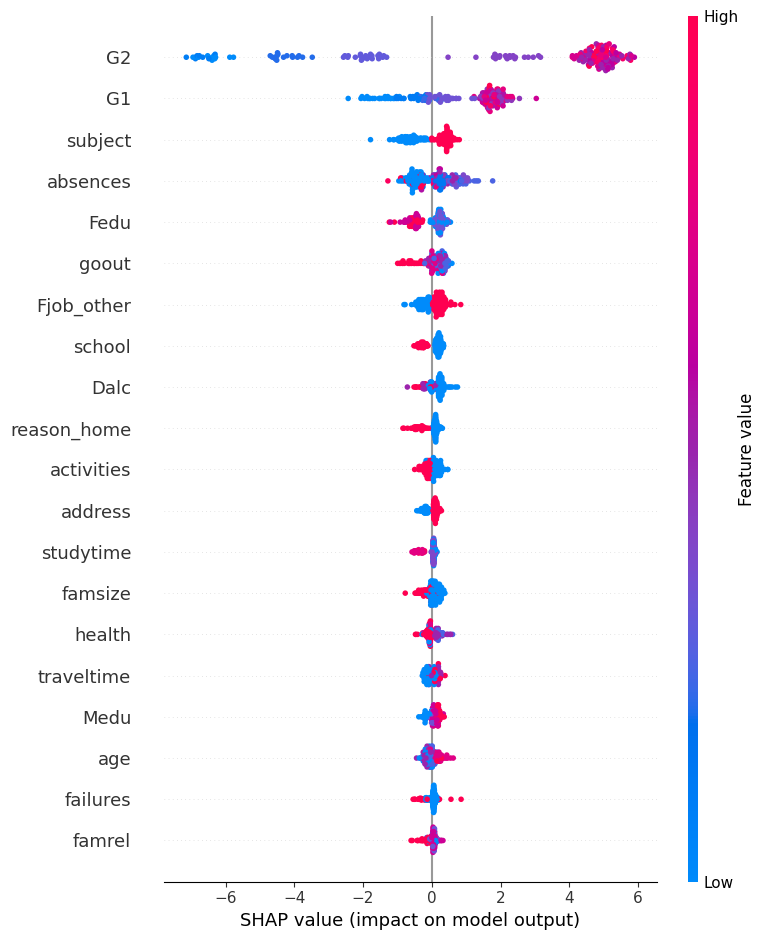

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_orig)
shap_values = explainer(X_test_cls)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test_cls)

To understand which features were most important to the overall model predictions, I used SHAP (SHapley Additive exPlanations). The SHAP summary plot provides a global interpretation by showing how each feature contributes to the model’s output across all predictions.

From the chart, it's clear that G2 (second period grade) and G1 (first period grade) are by far the most influential features in predicting whether a student will pass or fail. This makes sense since prior academic performance is usually the strongest indicator of future success. Students with higher G1 and G2 values (shown in pink on the right) have a strong positive impact on the prediction, meaning the model is more confident they will pass. On the other hand, lower values (in blue) tend to push the prediction toward failing.

Other important features include subject, absences, and Fedu (father's education level). For instance, high absences (red points on the left) have a negative impact on predictions, which is expected since students who miss more school tend to perform worse. Similarly, factors like going out (goout), daily alcohol consumption (Dalc), and study time also contribute to how the model makes its decisions, though their influence is smaller compared to grades.

The color scale in the plot shows whether a feature was high (red) or low (blue) for a particular instance, and how much that pushed the prediction. Overall, SHAP gave me a very clear picture of which features the model is relying on most and how changes in these features influence its predictions. This helped confirm that the model is learning meaningful patterns and is not just guessing based on noise.

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# Get class names
class_names = ['Fail', 'Pass']

# Step 1: Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_cls),
    feature_names=X_train_cls.columns.tolist(),
    class_names=class_names,
    mode='classification'
)


In [ ]:
# Step 2: Pick a sample to explain
i = 5  # You can change this to any index
sample = X_test_cls.iloc[i].values.reshape(1, -1)
true_class = y_test_cls.iloc[i]

In [ ]:
# Step 3: Explain the prediction
exp = explainer.explain_instance(
    data_row=X_test_cls.iloc[i],
    predict_fn=xgb_orig.predict_proba
)

# Step 4: Show explanation in notebook
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

we used LIME (Local Interpretable Model-Agnostic Explanations) on a specific student prediction. The model predicted with 100% confidence that the student would pass, and LIME helped identify the key factors influencing this outcome.

The most influential features were the student’s prior academic performance, specifically their first period grade (G1 = 0.26) and second period grade (G2 = 0.53). These features had the highest positive contributions toward the "Pass" prediction. This aligns with educational expectations, as previous performance is often the strongest predictor of final success.

Other contributing factors included:

Fjob_health = 0.00: The father's job in the health sector positively influenced the prediction.

guardian = other (0.00): Having a non-parental guardian slightly contributed positively.

Fedu = -1.26: Although the father’s education level was relatively low, it still contributed positively, possibly due to interactions with other strong features.

Fjob_other = 1.00 and subject = 0.78: These values provided small positive influences as well.

reason = other (0.00) and traveltime = 0.65: The defined reason for school choice and moderate travel time both contributed positively.

However, the feature schoolsup = -0.36 (indicating the student receives school support) slightly pulled the prediction toward "Fail." This might be because students needing extra support are sometimes at higher risk academically. Yet, in this case, the student’s strong grades outweighed this factor.